# Задача 1.1 Вычисление многочлена по схеме Горнера

$$a_0 x^n + \ldots + a_{n-1} x + a_n = (...((a_0 x + a_1) x + a_2)\cdot x + \ldots + a_{n-1}) x + a_n$$
$$s_0 = a_0$$
$$s_1 = ((s_o x)(1+\delta_1) + a_1)(1+\delta_2) \approx a_0 x(1+\delta)^2 + a_1 (1+\delta)$$
$$s_2 = ((s_1 x)(1+\delta_3) + a_2)(1+\delta_4) \approx a_0 x^2(1+\delta)^4 + a_1 x(1+\delta)^3 + a_2 (1+\delta)$$
$$s_3 = ((s_2 x)(1+\delta_5) + a_3)(1+\delta_6) \approx a_0 x^3(1+\delta)^6 + a_1 x^2(1+\delta)^5 + a_2 x(1+\delta)^3 + a_3(1+\delta)$$

$$\ldots$$
$$s_n = ((s_{n-1} x)(1+\delta_{2n-1}) + a_n)(1+\delta_{2n}) \approx$$
$$\approx a_0 x^n(1+\delta)^{2n} + a_1 x^{n-1}(1+\delta)^{2n-1} + a_2 x^{n-2}(1+\delta)^{2n-3} + a_3 x^{n-3}(1+\delta)^{2n-5} + \ldots + a_n (1+\delta)$$
При $n\varepsilon < 1:$
$$\prod_{i=1}^n (1+\delta_i) \leqslant (1+\varepsilon)^n = 1 + n\varepsilon + O(\varepsilon^2)$$
$$\prod_{i=1}^n (1+\delta_i) \geqslant (1-\varepsilon)^n = 1 - n\varepsilon + O(\varepsilon^2)$$
Значит, c точностью до $O(\varepsilon^2)$ имеем $|\Delta_i| \leqslant n\varepsilon$
$$s_n \approx \sum_{i=0}^n a_i x^{n-i} (1+\Delta_i)$$
Итого, 
$$|s_n - s| = \left|\sum_{i=0}^n a_ix^{n-i}\Delta_i \right| \leqslant n\varepsilon \sum_{i=0}^n \left| a_ix^{n-i} \right|$$

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.4)
plt.style.use("dark_background")
sns.set_palette(sns.color_palette("Paired"))


def Horner(a, x):
    n = len(a)
    s = 0.0
    for i in range(n):
        s = s * x + a[i]
    return s

In [110]:
grid = np.linspace(1.92, 2.08, 1000).astype(np.float64)

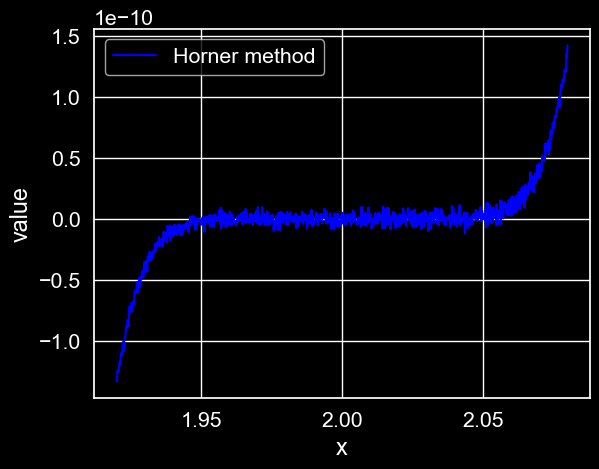

In [111]:
a = np.array([1, -18, 144, -672, 2016, -4032, 5376, -4608, 2304, -512]).astype(np.float64)
H = np.array([Horner(a, x) for x in grid])
plt.xlabel('x')
plt.ylabel('value')
plt.plot(grid, H, label='Horner method', color='blue')
plt.legend();

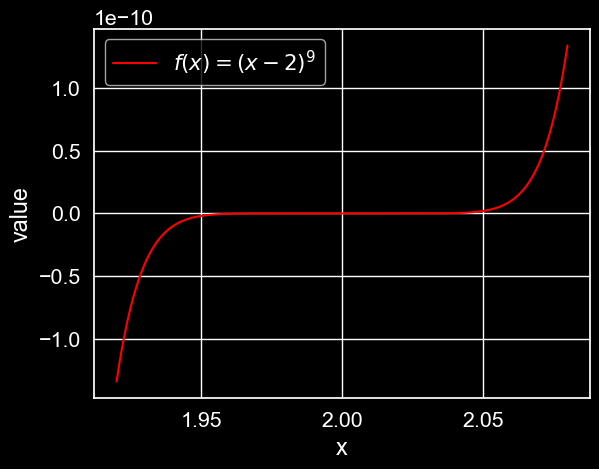

In [112]:
f = np.power((grid - 2.0), 9.0).astype(np.float64)
plt.xlabel('x')
plt.ylabel('value')
plt.plot(grid, f, label='$f(x) = (x-2)^9$', color='red')
plt.legend();

В нашем случае 
$$\sum_{i=0}^n \left| a_ix^{n-i} \right| = (x+2)^9$$

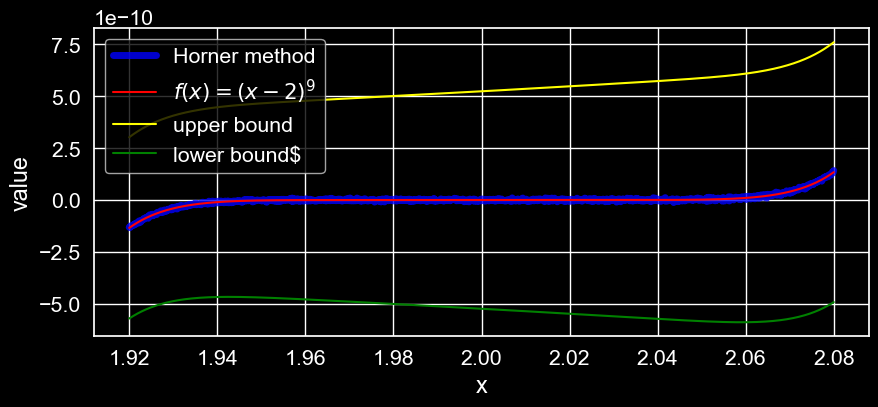

In [113]:
plt.figure(figsize=(10, 4))
plt.xlabel('x')
plt.ylabel('value')
plt.plot(grid, H, label='Horner method', color='blue', lw=5, alpha=0.8)
plt.plot(grid, f, label='$f(x) = (x-2)^9$', color='red')
eps = np.finfo(np.float64).eps  # машинное epsilon
delta = np.power((abs(grid + 2)), 9).astype(np.float64) * 9 * eps
upper_bound = f + delta
lower_bound = f - delta
plt.plot(grid, upper_bound, label='upper bound', color='yellow')
plt.plot(grid, lower_bound, label='lower bound$', color='green')
plt.legend();